# DLCV Assignment 2


<b>Name:</b>  Raja Sekhar M <br>
<b>SR No:</b> 6000014806

## Experiment 1

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import engine
from model import ViT
import utils

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
#classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [5]:
len(trainset), len(testset)

(50000, 10000)

In [9]:
model = ViT(
    img_size=32,
    patch_size=4,
    num_classes=10,
    num_transformer_layers=6,
    embedding_dim=64,
    num_heads=4,
    mlp_size=128
)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
loss_fn = torch.nn.CrossEntropyLoss()
results = engine.train(model=model,
             train_dataloader=trainloader,
             test_dataloader=testloader,
             optimizer=optimizer,
             loss_fn=loss_fn,
             device=device,
             epochs=10)

 10%|█         | 1/10 [08:00<1:12:08, 480.93s/it]

Epoch: 1 | train_loss: 1.8693 | train_acc: 0.3163 | test_loss: 1.6230 | test_acc: 0.4208


 20%|██        | 2/10 [1:23:36<6:22:06, 2865.85s/it]

Epoch: 2 | train_loss: 1.5783 | train_acc: 0.4294 | test_loss: 1.4572 | test_acc: 0.4744


 30%|███       | 3/10 [1:38:49<3:50:20, 1974.29s/it]

Epoch: 3 | train_loss: 1.4578 | train_acc: 0.4746 | test_loss: 1.3776 | test_acc: 0.5012


 40%|████      | 4/10 [1:47:07<2:19:09, 1391.60s/it]

Epoch: 4 | train_loss: 1.3695 | train_acc: 0.5046 | test_loss: 1.3590 | test_acc: 0.5168


 50%|█████     | 5/10 [1:55:52<1:29:55, 1079.02s/it]

Epoch: 5 | train_loss: 1.3061 | train_acc: 0.5304 | test_loss: 1.2465 | test_acc: 0.5523


 60%|██████    | 6/10 [2:04:46<59:34, 893.55s/it]   

Epoch: 6 | train_loss: 1.2543 | train_acc: 0.5491 | test_loss: 1.2498 | test_acc: 0.5480


 70%|███████   | 7/10 [2:20:49<45:48, 916.25s/it]

Epoch: 7 | train_loss: 1.2088 | train_acc: 0.5687 | test_loss: 1.2357 | test_acc: 0.5650


 80%|████████  | 8/10 [2:29:21<26:15, 787.64s/it]

Epoch: 8 | train_loss: 1.1734 | train_acc: 0.5804 | test_loss: 1.1805 | test_acc: 0.5734


 90%|█████████ | 9/10 [2:37:50<11:40, 700.68s/it]

Epoch: 9 | train_loss: 1.1399 | train_acc: 0.5912 | test_loss: 1.1708 | test_acc: 0.5806


100%|██████████| 10/10 [2:46:40<00:00, 1000.01s/it]

Epoch: 10 | train_loss: 1.1059 | train_acc: 0.6034 | test_loss: 1.1811 | test_acc: 0.5823


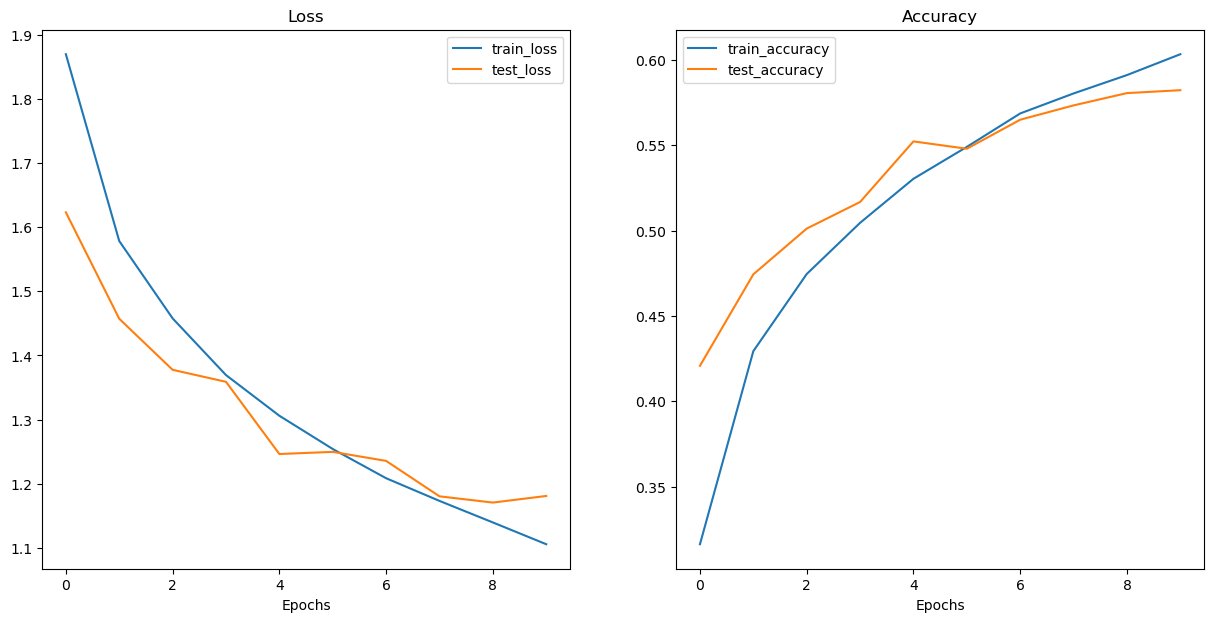

In [13]:
utils.plot_learning_curves(results)

## Experiment 2

In [7]:
import torch

trainset_5percent = torch.utils.data.Subset(trainset, range(int(0.05 * len(trainset))))
trainset_10percent = torch.utils.data.Subset(trainset, range(int(0.10 * len(trainset))))
trainset_25percent = torch.utils.data.Subset(trainset, range(int(0.25 * len(trainset))))
trainset_50percent = torch.utils.data.Subset(trainset, range(int(0.50 * len(trainset))))


trainloader_5percent = torch.utils.data.DataLoader(trainset_5percent, batch_size=4, shuffle=True, num_workers=2)
trainloader_10percent = torch.utils.data.DataLoader(trainset_10percent, batch_size=4, shuffle=True, num_workers=2)
trainloader_25percent = torch.utils.data.DataLoader(trainset_25percent, batch_size=4, shuffle=True, num_workers=2)
trainloader_50percent = torch.utils.data.DataLoader(trainset_50percent, batch_size=4, shuffle=True, num_workers=2)

In [ ]:
trainset_5percent = trainset[:int(0.05 * len(trainset))]
trainset_10percent = trainset[:int(0.1 * len(trainset))]
trainset_25percent = trainset[:int(0.25 * len(trainset))]
trainset_50percent = trainset[:int(0.5 * len(trainset))]

trainloader_5percent = torch.utils.data.DataLoader(trainset_5percent, batch_size=4, shuffle=True, num_workers=2)
trainloader_10percent = torch.utils.data.DataLoader(trainset_10percent, batch_size=4, shuffle=True, num_workers=2)
trainloader_25percent = torch.utils.data.DataLoader(trainset_25percent, batch_size=4, shuffle=True, num_workers=2)
trainloader_50percent = torch.utils.data.DataLoader(trainset_50percent, batch_size=4, shuffle=True, num_workers=2)

results_vs_datasize = {'5%_data': None, '10%_data': None, '25%_data': None, '50%_data': None, '100%_data': None}

data_sizes = ['5%_data', '10%_data', '25%_data', '50%_data', '100%_data']
trainloaders = [trainloader_5percent, trainloader_10percent, trainloader_25percent, trainloader_50percent, trainloader]
for i in range(len(data_sizes)):
    data_size = data_sizes[i]
    trainloader = trainloaders[i]
    model = ViT(
        img_size=32,
        patch_size=4,
        num_classes=10,
        num_transformer_layers=6,
        embedding_dim=64,
        num_heads=4,
        mlp_size=128
    ).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
    results = engine.train(model=model,
                 train_dataloader=trainloader,
                 test_dataloader=testloader,
                 optimizer=optimizer,
                 loss_fn=loss_fn,
                 device=device,
                 epochs=10)
    results_vs_datasize[data_size] = results


: 

In [ ]:
torch.save(model.state_dict(), 'vit_cifar10.pth')

## Experiment 3

In [ ]:
results_vs_patch_size = {'p_size=4': None, 'p_size=8': None, 'p_size=16': None}

for patch_size in ['4', '8', '16']:
    model = ViT(
        img_size=32,
        patch_size=int(patch_size),
        num_classes=10,
        num_transformer_layers=6,
        embedding_dim=64,
        num_heads=4,
        mlp_size=128
    ).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
    results = engine.train(model=model,
                 train_dataloader=trainloader,
                 test_dataloader=testloader,
                 optimizer=optimizer,
                 loss_fn=loss_fn,
                 device=device,
                 epochs=10)
    results_vs_patch_size[f'p_size={patch_size}'] = results

## Experiment 4

In [ ]:
results_vs_num_heads = {'n_heads=4': None, 'n_heads=8': None, 'n_heads=12': None}

for num_heads in ['4', '8', '12']:
    model = ViT(
        img_size=32,
        patch_size=4,
        num_classes=10,
        num_transformer_layers=6,
        embedding_dim=64,
        num_heads=int(num_heads),
        mlp_size=128
    ).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
    results = engine.train(model=model,
                 train_dataloader=trainloader,
                 test_dataloader=testloader,
                 optimizer=optimizer,
                 loss_fn=loss_fn,
                 device=device,
                 epochs=10)
    results_vs_num_heads[f'n_heads={num_heads}'] = results

## Experiment 5

In [4]:
trained_model = ViT(
    img_size=32,
    patch_size=4,
    num_classes=10,
    num_transformer_layers=6,
    embedding_dim=64,
    num_heads=4,
    mlp_size=128
).to(device)
trained_model.load_state_dict(torch.load('vit_exp1.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [5]:
def classify_with_CLS_l(model, img, l):
    '''Classifies an image using the CLS token of the l-th transformer layer'''
    model.to(device)
    model.eval()
    model(img)
    x = model.transformer_encoder[l].CLS
    out = model.classifier(x)
    out_class = torch.argmax(out).item()
    return out_class
    #return out

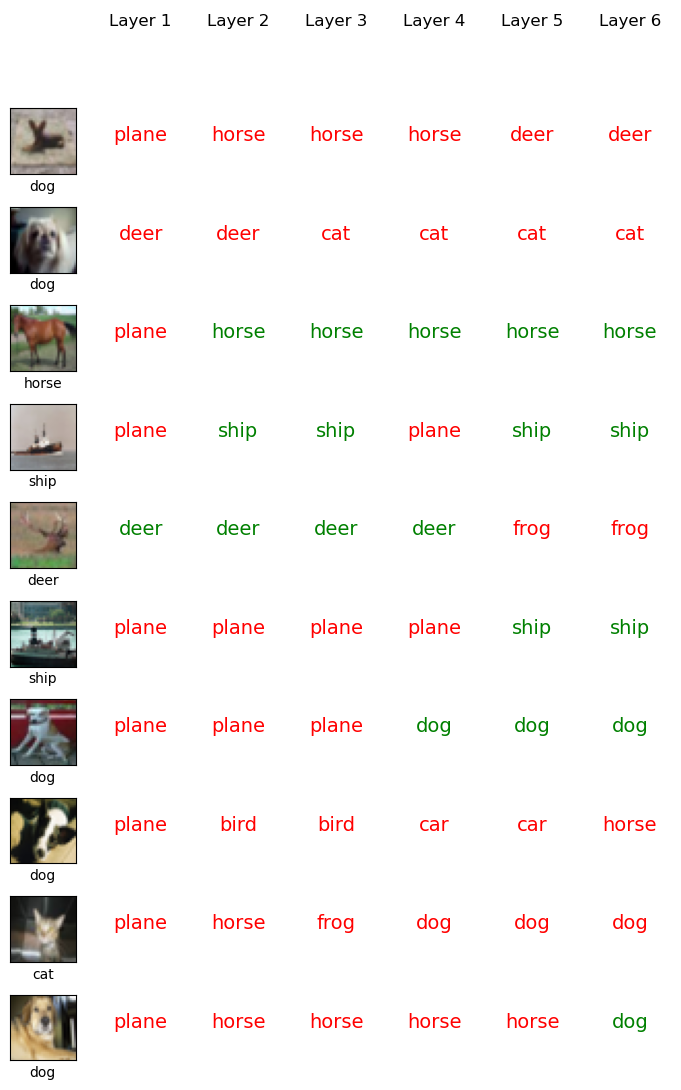

In [6]:
import torch.utils
import random
import matplotlib.pyplot as plt

samples = torch.utils.data.Subset(testset, random.sample(range(len(testset)), 10))
predictions_vs_layers = {}
for i in range(len(samples)):
    img = samples[i][0].unsqueeze(0)
    gt = samples[i][1]
    #print('Ground truth: ', gt)
    preds_for_img = []
    for l in range(6):
        out_class = classify_with_CLS_l(trained_model, img, l)
        #print(f'using layer {l} CLS token: ',out_class)
        preds_for_img.append(out_class)
    predictions_vs_layers[i] = preds_for_img
    
utils.plot_predictions_vs_layers(samples, predictions_vs_layers)

rows: 6, cols: 7


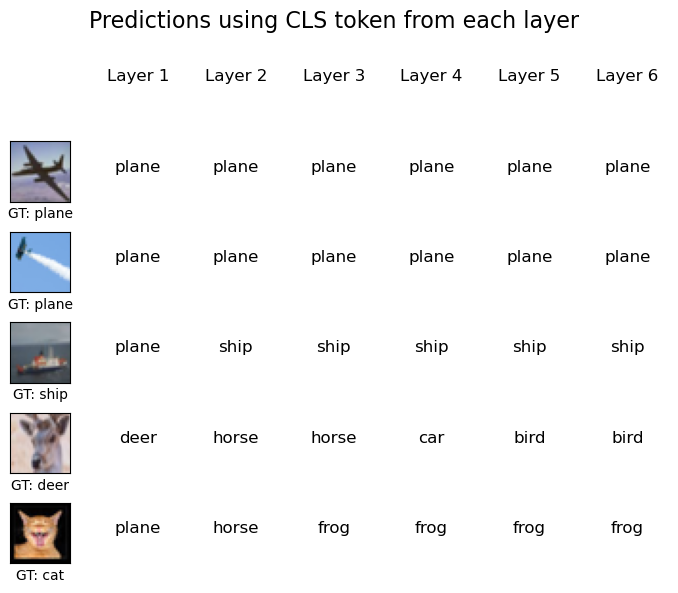

In [121]:
#list(predictions_vs_layers.keys())
#predictions_vs_layers[0]
rows = len(predictions_vs_layers.keys())+1
cols = len(predictions_vs_layers[0])+1
print(f'rows: {rows}, cols: {cols}')
fig = plt.figure(figsize=(cols, rows))
fig.suptitle('Predictions using CLS token from each layer', fontsize=16)
for l in range(cols-1):
    plt.subplot(rows, cols, l+2)
    plt.text(0.5, 0.5, f'Layer {l+1}', fontsize=12, ha='center')
    plt.axis('off')
for i in range(rows-1):
    img = samples[i][0].squeeze().permute(1, 2, 0)
    gt = samples[i][1]
    preds = predictions_vs_layers[i]
    plt.subplot(rows, cols, (i+1) * cols + 1)
    plt.imshow(img)
    plt.xlabel(f'GT: {classes[gt]}')
    plt.xticks([])
    plt.yticks([])
    for l in range(cols-1):
        plt.subplot(rows, cols, (i+1) * cols + l + 2)
        plt.text(0.5, 0.5, str(classes[preds[l]]), fontsize=12, ha='center')
        plt.axis('off')
        #plt.title(f'Layer {l}')
        plt.xlabel(f'Layer {l}')
        
plt.tight_layout()
fig.subplots_adjust(hspace=0.5)
plt.show()

## Experiment 6

In [146]:
sample_subset = torch.utils.data.Subset(testset, [0, 1, 2])
for img,label in sample_subset:
    print(type(label))

<class 'int'>
<class 'int'>
<class 'int'>


In [172]:
def get_2_images_per_class(dataset):
    samples = []
    for i in range(10):
        for img, label in dataset:
            if label == i:
                samples.append((img, label))
                if len(samples)%2 == 0:
                    break
        if len(samples) == 20:
            break
    return samples

In [170]:
len(samples)

20

In [6]:
trained_model = ViT(
    img_size=32,
    patch_size=4,
    num_classes=10,
    num_transformer_layers=6,
    embedding_dim=64,
    num_heads=4,
    mlp_size=128
).to(device)
trained_model.load_state_dict(torch.load('vit_exp1.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [10]:
len(trained_model.transformer_encoder)

6

In [ ]:
def attention_rollout(attentions):
    # Initialize rollout with identity matrix
    rollout = torch.eye(attentions[0].size(-1)).to(attentions[0].device)

    # Multiply attention maps layer by layer
    for attention in attentions:
        attention_heads_fused = attention.mean(dim=1) # Average attention across heads
        attention_heads_fused += torch.eye(attention_heads_fused.size(-1)).to(attention_heads_fused.device) # A + I
        attention_heads_fused /= attention_heads_fused.sum(dim=-1, keepdim=True) # Normalizing A
        rollout = torch.matmul(rollout, attention_heads_fused) # Multiplication

    return rollout

def get_attentions(model, image):
    model.eval()
    output = model(image.unsqueeze().to(device))
    attentions = []
    for i in range(len(trained_model.transformer_encoder)):
        attentions.append(trained_model.transformer_encoder[i].attn_weights)
    return attentions